# Introduction

## Description of the Problem and Discuss of the background

Argentina is located in South America, it is one of the biggest countries in the region. His population is around 40 million, the most important city is Buenos Aires, specially Autonomous City of Buenos Aires (CABA). 

CABA has 3 million of inhabitants in his neighborhoods. The argentinian people is a mixture of different nacionalities: spanishs, italians, frenchs, uruguayans, bolivian, etc. For this reason, there is a lot of ethnic restaurants and places with cultures and foreing traditions. This is an oportunity for inmigrants and people who want place a tematical restaurant. 

In my Final Project, I will analyse with differents sources, the neighborhoods in CABA for search one potential place for begin a Italian Restaurant. 



## Description of the Data and it's use

In this project I will use different sources, next I mention it:

- Neighborhoods Buenos Aires (CABA) 

Link: http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson

Source: Goverment of Buenos Aires

It contain a list of neighborhood of Buenos Aires with his latitude and longitude values.

- Square Meter Price 

Link: http://cdn.buenosaires.gob.ar/datosabiertos/datasets/acceso-vivienda-y-mercado-inmobiliario/precio-venta-deptos.csv
Source: Goverment of Buenos Aires

It contain the average price for deparments in dollars. 

- Criminal acts

Link: https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2019.csv
Source: Goverment of Buenos Aires

It contain the criminal acts like as robberies and homicides and his location. 

- Cultural places/dependencies

Link: http://cdn.buenosaires.gob.ar/datosabiertos/datasets/dependencias-culturales/dependencias-culturales.csv
Source: Goverment of Buenos Aires

It contain a list of different cultural places like as museums, cinemas, theaters, etc. 

- Venues of Foursquare API : restaurants, bars, stores and others

Link: https://foursquare.com/
Source: Fousquare

I will use these data for make a study with exploratory analysis and geospatial analysis. Also, I will include maps for a better compression and finally, I will take a decision based on results.




## Methodology 

For this project I will use a Exploratory Data Analysis (EDA) and Map projections. In the final part, I will use a machine learning algorithm called Clustering to find Cluster in the Venues of selected neighborhoods. 

In [435]:
#Import all libraries and other stuffs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import requests
import folium
import json
from urllib.request import urlopen
from pandas.io.json import json_normalize
import seaborn as sns
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans

## Data obteined 

### Neighborhoods in Buenos Aires City

The data is from the goverment of Autonomous City of Buenos Aires (CABA is the alias in Spanish)

In [436]:
!wget --quiet http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson
caba_geo = r'barrios.geojson' # geojson file

### Characteristics of neighborhoods

### Prices in neighbourhood

It is interesting make a price list of different areas in Buenos Aires. We are looking a place with high purchasing power, so the surface price (square meters - M2) is a good proxy of consumption capability of people. 

The data is from the goverment of Autonomous City of Buenos Aires (CABA is the alias in Spanish)

In [437]:
url_sell = 'http://cdn.buenosaires.gob.ar/datosabiertos/datasets/acceso-vivienda-y-mercado-inmobiliario/precio-venta-deptos.csv'
dfviv = pd.read_csv(url_sell)
price2019 = dfviv[dfviv['año'] >= 2019]

In [438]:
# List of neighb. of Buenos Aires CABA

neigh = price2019["barrio"].unique()
neigh = pd.DataFrame(neighborhoods)
neigh.rename(columns={0:"Neighborhood"}, inplace=True)

In [439]:
price2019.rename(columns={"barrio": "Neighborhood", "año": "year", "trimestre": "quarter","precio_prom": "avg_price", "ambientes": "rooms", "estado": "status","comuna": "commune"}, inplace=True)
price2019.head()

c:\users\federico\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Neighborhood,year,quarter,avg_price,rooms,status,commune
36,AGRONOMIA,2019,1,NaN,2 ambientes,Usado,15
37,AGRONOMIA,2019,2,NaN,2 ambientes,Usado,15
74,ALMAGRO,2019,1,2695.0,2 ambientes,Usado,5
75,ALMAGRO,2019,2,2640.0,2 ambientes,Usado,5
112,BALVANERA,2019,1,2245.0,2 ambientes,Usado,3


In [440]:
# Drop NaN 

price2019 = price2019.dropna()
price2019

,Neighborhood,year,quarter,avg_price,rooms,status,commune
74,ALMAGRO,2019,1,2695.0,2 ambientes,Usado,5
75,ALMAGRO,2019,2,2640.0,2 ambientes,Usado,5
112,BALVANERA,2019,1,2245.0,2 ambientes,Usado,3
113,BALVANERA,2019,2,2272.0,2 ambientes,Usado,3
150,BARRACAS,2019,1,2490.0,2 ambientes,Usado,4
...,...,...,...,...,...,...,...
6839,VILLA CRESPO,2019,2,3290.0,3 ambientes,A estrer,15
7028,VILLA LURO,2019,1,2756.0,3 ambientes,A estrer,10
7029,VILLA LURO,2019,2,2800.0,3 ambientes,A estrer,10
7294,VILLA URQUIZA,2019,1,3424.0,3 ambientes,A estrer,12


In [441]:
#Selecting Top 15 Most expensive Neighborhoods

top15 = price2019.groupby(["Neighborhood"],as_index=False).mean().sort_values("avg_price", ascending=False, inplace=False).head(15)
top15

,Neighborhood,year,quarter,avg_price,commune
22,PUERTO MADERO,2019.0,1.500000,6121.000000,1.0
18,PALERMO,2019.0,1.500000,3840.750000,14.0
3,BELGRANO,2019.0,1.500000,3771.750000,13.0
23,RECOLETA,2019.0,1.500000,3704.750000,2.0
17,NUÑEZ,2019.0,1.500000,3617.750000,13.0
9,COLEGIALES,2019.0,1.500000,3512.250000,13.0
8,COGHLAN,2019.0,1.500000,3373.250000,12.0
39,VILLA URQUIZA,2019.0,1.500000,3335.875000,12.0
36,VILLA ORTUZAR,2019.0,1.000000,3298.000000,15.0
24,RETIRO,2019.0,1.500000,3150.750000,1.0


In [442]:
top15.drop(columns=["commune"], inplace=True)
top15.rename(columns={"year" : "lat","quarter" : "lon"}, inplace=True)


In [443]:
top15["lat"] = 0.0
top15["lon"] = 0.0


In [444]:
from geopy.exc import GeocoderTimedOut
str_city = ', CABA'

def get_location(address):
    try:
        coord = []
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        coord.append(latitude)
        coord.append(longitude)
        print('The geograpical coordinate of {} are {}, {}.'.format(address, coord[0], coord[1]))
        return coord
    except GeocoderTimedOut: #Get rid of Nominatim TimeOut
        return get_location(address)

In [445]:
#Finding latitude and longitude for Top 15

for i, row in top15.iterrows():
    address = row[0]+str_city
    print("Adress:" , address) 
    res = get_location(address)
    top15.at[i, "lat"] = res[0]
    top15.at[i, "lon"] = res[1]
    
top15

Adress: PUERTO MADERO, CABA
The geograpical coordinate of PUERTO MADERO, CABA are -34.6103764, -58.3622067.
Adress: PALERMO, CABA
The geograpical coordinate of PALERMO, CABA are -34.5803362, -58.4245236.
Adress: BELGRANO, CABA
The geograpical coordinate of BELGRANO, CABA are -34.5613076, -58.4565454.
Adress: RECOLETA, CABA
The geograpical coordinate of RECOLETA, CABA are -34.587358, -58.39157.
Adress: NUÑEZ, CABA
The geograpical coordinate of NUÑEZ, CABA are -34.5453484, -58.4621491.
Adress: COLEGIALES, CABA
The geograpical coordinate of COLEGIALES, CABA are -34.5745154, -58.4522819.
Adress: COGHLAN, CABA
The geograpical coordinate of COGHLAN, CABA are -34.5599096, -58.4747142.
Adress: VILLA URQUIZA, CABA
The geograpical coordinate of VILLA URQUIZA, CABA are -34.5732414, -58.4914785.
Adress: VILLA ORTUZAR, CABA
The geograpical coordinate of VILLA ORTUZAR, CABA are -34.581302, -58.4682453.
Adress: RETIRO, CABA
The geograpical coordinate of RETIRO, CABA are -34.5916426, -58.373307.
Adres

,Neighborhood,lat,lon,avg_price
22,PUERTO MADERO,-34.610376,-58.362207,6121.000000
18,PALERMO,-34.580336,-58.424524,3840.750000
3,BELGRANO,-34.561308,-58.456545,3771.750000
23,RECOLETA,-34.587358,-58.391570,3704.750000
17,NUÑEZ,-34.545348,-58.462149,3617.750000
9,COLEGIALES,-34.574515,-58.452282,3512.250000
8,COGHLAN,-34.559910,-58.474714,3373.250000
39,VILLA URQUIZA,-34.573241,-58.491478,3335.875000
36,VILLA ORTUZAR,-34.581302,-58.468245,3298.000000
24,RETIRO,-34.591643,-58.373307,3150.750000


### Map of prices 

In [446]:
caba_latitude= -34.67
caba_longitude= -58.41

caba_precio_map = folium.Map(location=[caba_latitude,caba_longitude], zoom_start=11)


caba_precio_map.choropleth(
    geo_data=caba_geo,
    data=top15,
    columns=['Neighborhood', 'avg_price'],
    key_on='feature.properties.barrio',
    fill_color='PuRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Top 10 : Price of M2 in CABA')

caba_precio_map

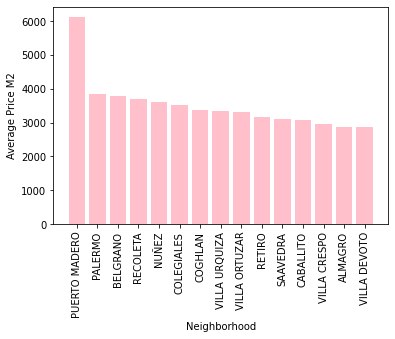

In [447]:
plt.bar(top15["Neighborhood"], top15["avg_price"], color = "pink")

plt.xlabel("Neighborhood")
plt.ylabel("Average Price M2")
plt.xticks(rotation=90);

The highest value of M2 is Puerto Madero, Palermo, Belgrano, Recoleta and Nuñez for the first five. These neighborhoods are perfect candidates for place the Italian Restaurant. 

### Security in Neighborhoods

One import thing is considerate the security of an area, for this I use the data from the https://www.estadisticaciudad.gob.ar/ , it is the page of Statistical Office of CABA. 

In [448]:
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2019.csv" 
df_del = pd.read_csv(url, sep=',' , encoding='utf-8')
df_del["barrio"] = df_del["barrio"].str.upper()


c:\users\federico\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [449]:
# Count for each neighborhood

df_del1 = df_del.groupby(["barrio"]).count().reset_index()
df_del1.drop(df_del1.columns.difference(['barrio','id']), 1, inplace=True)
df_del1.rename(columns={'id':'Count', "barrio":"Neighborhood"}, inplace=True)


### Map of criminal acts

In [450]:
caba_latitude= -34.67
caba_longitude= -58.41

caba_del_map = folium.Map(location=[caba_latitude,caba_longitude], zoom_start=11)


caba_del_map.choropleth(
    geo_data=caba_geo,
    data=df_del1,
    columns=["Neighborhood", "Count"],
    key_on='feature.properties.barrio',
    fill_color='PuRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    highlight=True,
    #threshold_scale=[0],
    legend_name='Counts of Criminal acts')


caba_del_map

Lets see the criminal acts in Top 15 of the most expensive neighborhoods

In [451]:
neighborhoods = top15['Neighborhood'].to_list()
df_del1= df_del1[df_del1['Neighborhood'].isin(neighborhoods)]
df_del1.sort_values('Count', ascending=False, inplace=True)

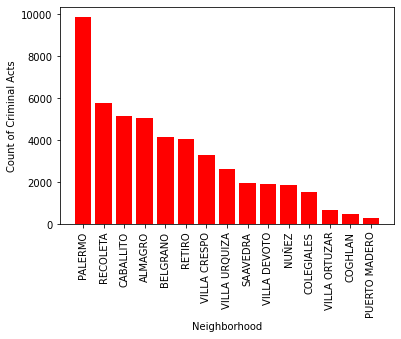

In [452]:
plt.bar(df_del1["Neighborhood"], df_del1["Count"], color = "red")

plt.xlabel("Neighborhood")
plt.ylabel("Count of Criminal Acts")
plt.xticks(rotation=90);

It is look like Palermo has a lot of criminal acts, however Puerto Madero is the most expensive neighborhood but it has the lowest record of criminal acts in 2019

### Cultural sites 
Proximity to some cultural sites may be beneficial for the restaurant, for that I will use the data of Government of the City of Buenos Aires. 

In [453]:
url = "http://cdn.buenosaires.gob.ar/datosabiertos/datasets/dependencias-culturales/dependencias-culturales.csv" 
df_cult = pd.read_csv(url, sep=';' , encoding='utf-8')
df_cult.head()

,LAT,LNG,ID,NOMBRE,CALLE,ALTURA,PISO_DEPTO,DIRECCION_NORMALIZADA,BARRIO,COMUNA,...,CPA,DIAS_Y_HORARIO,TELEFONOS,EMAIL,WEB,ACTIVIDAD,OTRAS_ACTIDADES,DEPENDENCIA,PUBLICO,SECTOR
0,-34.609173,-58.384297,192,36 BILLARES,DE MAYO AV.,1265,NaN,DE MAYO AV. 1265,MONSERRAT,COMUNA 01,...,C1085ABC,NaN,4381-5696,INFO@LOS36BILLARES.COM.AR,WWW.LOS36BILLARES.COM.AR,BAR NOTABLE,NaN,NaN,GENERAL,PRIVADO
1,-34.596817,-58.383559,1467,ABM,"ALVEAR, MARCELO T. DE",1155,NaN,"ALVEAR, MARCELO T. DE 1155",RETIRO,COMUNA 01,...,C1058AAQ,LUNES A VIERNES DE 9 A 22,4816-1314 / 1644,INFO@ABM.EDU.AR,WWW.ABM.EDU.AR,ESPACIO DE FORMACION (SEMINARIOS Y TALLERES),NaN,NaN,GENERAL,PRIVADO
2,-34.609848,-58.370739,1788,ACADEMIA NACIONAL DE LA HISTORIA DE LA REPUBLI...,BALCARCE,139,NaN,BALCARCE 139,MONSERRAT,COMUNA 01,...,C1064AAC,NaN,343-4416 // 4331-4633 // 4331-5147,NaN,WWW.AN-HISTORIA.ORG.AR,MUSEO,NaN,NaN,GENERAL,ONG
3,-34.618628,-58.385471,296,ACADEMIA PORTEÑA DEL LUNFARDO,ESTADOS UNIDOS,1379,NaN,ESTADOS UNIDOS 1379,CONSTITUCION,COMUNA 01,...,C1101ABA,LUNES A VIERNES DE 14:00 A 19:00,4383-2393,OLIVIERIEDITOR@HOTMAIL.COM,HTTP://WWW.TODOTANGO.COM/ALUNFARDO/,ESPACIO DE FORMACION (SEMINARIOS Y TALLERES),NaN,NaN,GENERAL,ONG
4,-34.611321,-58.372772,1147,ACCION,MORENO,457,NaN,MORENO 457,MONSERRAT,COMUNA 01,...,C1091AAI,NaN,4343-6474,NaN,NaN,LIBRERIA,NaN,NaN,GENERAL,PRIVADO


From thise Data frame, I chose the following activities: 

- Museaum
- Cinema
- Art Gallery
- Television place

These places are potential demand for the restaurant, its important to see how many are in the Top 15.

In [454]:
df_cult.drop(df_cult.columns.difference(['BARRIO','ID', 'ACTIVIDAD', 'LAT', 'LNG']), 1, inplace=True)
df_cult.rename(columns={"BARRIO": "Neighborhood", "ACTIVIDAD": "Activity"}, inplace=True)

In [455]:
df_cult['Activity'].unique()

array(['BAR NOTABLE', 'ESPACIO DE FORMACION (SEMINARIOS Y TALLERES)',
       'MUSEO', 'LIBRERIA', 'EDITORIAL', 'BAR IDENTIFICADO',
       'SELLO DISCOGRAFICO', 'GALERIA DE ARTE', 'CENTRO CULTURAL',
       'RADIO LOCAL (AM Y FM)',
       'ESPACIO ESCENICO (TEATRO, MUSICA Y DANZA)',
       'PRODUCTORA AUDIOVISUAL', 'ARCHIVO', 'BIBLIOTECA', 'CINE',
       'BAR CULTURAL', 'DISQUERIA', 'CALESITA', 'MILONGA Y/O TANGUERIA',
       'BAR ELEMENTO', 'SALA DE EXPOSICION', 'TELEVISION LOCAL',
       'ESPACIO CULTURAL', 'PEÑA', 'PLANETARIO', 'CIRCO'], dtype=object)

In [456]:
sel_cult= ['MUSEO' , 'GALERIA DE ARTE', 'CINE', 'TELEVISION LOCAL']
selected_cult = df_cult[df_cult['Activity'].isin(sel_cult)]
selected_cult

,LAT,LNG,ID,Neighborhood,Activity
2,-34.609848,-58.370739,1788,MONSERRAT,MUSEO
11,-34.591477,-58.379803,397,RETIRO,GALERIA DE ARTE
28,-34.614484,-58.376102,389,MONSERRAT,GALERIA DE ARTE
33,-34.604350,-58.371931,473,SAN NICOLAS,MUSEO
37,-34.627145,-58.382788,636,CONSTITUCION,CINE
...,...,...,...,...,...
1975,-34.629369,-58.462470,681,FLORES,CINE
2013,-34.627703,-58.470860,499,FLORES,MUSEO
2063,-34.650817,-58.501779,83,MATADEROS,CINE
2064,-34.640261,-58.526855,1070,LINIERS,CINE


### Map cultural places (points) 

In [457]:
selected_cult_map = folium.Map(location=[caba_latitude,caba_longitude], zoom_start=11)

for neighborhood , lat, long in zip(selected_cult.Neighborhood, selected_cult.LAT, selected_cult.LNG):
    folium.Circle(location=[lat, long], radius=10, color='purple').add_to(selected_cult_map)

selected_cult_map

In a first view, there are a lot of cultural places (museum, art galleries, cinema and television)  in the centre of CABA. 

In [458]:
sel_cultm= ['MUSEO']
selected_cultm = df_cult[df_cult['Activity'].isin(sel_cultm)]


sel_cultc= ['CINE']
selected_cultc = df_cult[df_cult['Activity'].isin(sel_cultc)]


In [459]:
#Museum

museum = selected_cultm.groupby('Neighborhood', as_index=False).count()
museum.rename(columns={"ID":'Count'}, inplace=True)
museum.drop(columns=['Activity','LAT','LNG'], inplace=True)
museum.sort_values('Count', ascending=False, inplace=True)

#Cinema

cinema= selected_cultc.groupby('Neighborhood', as_index=False).count()
cinema.rename(columns={"ID":'Count'}, inplace=True)
cinema.drop(columns=['Activity','LAT','LNG'], inplace=True)
cinema.sort_values('Count', ascending=False, inplace=True)


In [460]:
neighborhoods = top15['Neighborhood'].to_list()
museum = museum[museum['Neighborhood'].isin(neighborhoods)]


neighborhoods = top15['Neighborhood'].to_list()
cinema = cinema[cinema['Neighborhood'].isin(neighborhoods)]
cinema

,Neighborhood,Count
2,BELGRANO,4
11,RETIRO,2
0,ALMAGRO,1
10,RECOLETA,1
12,SAAVEDRA,1
8,PALERMO,1
9,PUERTO MADERO,1
3,CABALLITO,1
16,VILLA DEVOTO,1


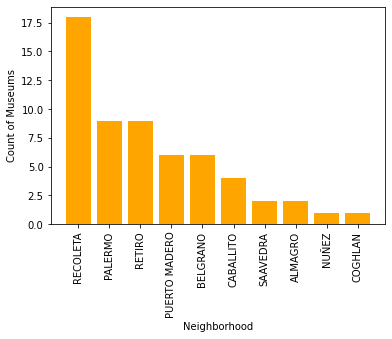

In [461]:
plt.bar(museum["Neighborhood"], museum["Count"], color = "orange")

plt.xlabel("Neighborhood")
plt.ylabel("Count of Museums")
plt.xticks(rotation=90);

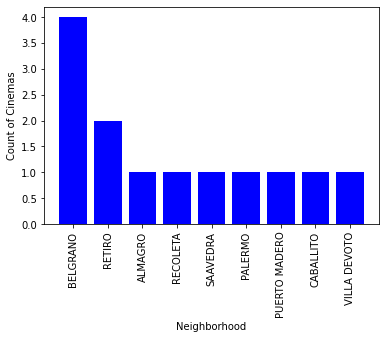

In [462]:
plt.bar(cinema["Neighborhood"], cinema["Count"], color = "blue")

plt.xlabel("Neighborhood")
plt.ylabel("Count of Cinemas")
plt.xticks(rotation=90);

Recoleta is the place with more Museums and Belgrano has four cinemas. 

### FOURSQUARE API

In this section I use the API of Foursquare to obtein information about near places of a location.

In [463]:
#Define values to connect with Foursquare

CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'xxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 1000

In [464]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [465]:
top15

,Neighborhood,lat,lon,avg_price
22,PUERTO MADERO,-34.610376,-58.362207,6121.000000
18,PALERMO,-34.580336,-58.424524,3840.750000
3,BELGRANO,-34.561308,-58.456545,3771.750000
23,RECOLETA,-34.587358,-58.391570,3704.750000
17,NUÑEZ,-34.545348,-58.462149,3617.750000
9,COLEGIALES,-34.574515,-58.452282,3512.250000
8,COGHLAN,-34.559910,-58.474714,3373.250000
39,VILLA URQUIZA,-34.573241,-58.491478,3335.875000
36,VILLA ORTUZAR,-34.581302,-58.468245,3298.000000
24,RETIRO,-34.591643,-58.373307,3150.750000


In [466]:
top15_venues = getNearbyVenues(names=top15['Neighborhood'],
                                   latitudes=top15['lat'],
                                   longitudes=top15['lon']
                                  )

PUERTO MADERO
PALERMO
BELGRANO
RECOLETA
NUÑEZ
COLEGIALES
COGHLAN
VILLA URQUIZA
VILLA ORTUZAR
RETIRO
SAAVEDRA
CABALLITO
VILLA CRESPO
ALMAGRO
VILLA DEVOTO


In [467]:
top15_venues.to_csv("top15_venues.csv")

In [468]:
print(top15_venues.shape)
top15_venues.head(10)

(1357, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PUERTO MADERO,-34.610376,-58.362207,Alvear Icon,-34.610553,-58.361741,Hotel
1,PUERTO MADERO,-34.610376,-58.362207,Osaka,-34.611101,-58.362423,Japanese Restaurant
2,PUERTO MADERO,-34.610376,-58.362207,Ol'days (Coffee and Deli),-34.611202,-58.363471,Coffee Shop
3,PUERTO MADERO,-34.610376,-58.362207,Plaza de la Mujer,-34.609440,-58.362797,Athletics & Sports
4,PUERTO MADERO,-34.610376,-58.362207,Parque Mujeres Argentinas,-34.607950,-58.361553,Park
5,PUERTO MADERO,-34.610376,-58.362207,Faena Hotel Buenos Aires,-34.613737,-58.361987,Hotel
6,PUERTO MADERO,-34.610376,-58.362207,Starbucks,-34.610911,-58.362460,Coffee Shop
7,PUERTO MADERO,-34.610376,-58.362207,Marcelo Cocina Italiana,-34.610739,-58.365817,Italian Restaurant
8,PUERTO MADERO,-34.610376,-58.362207,Puerto Cristal,-34.610100,-58.365872,Argentinian Restaurant
9,PUERTO MADERO,-34.610376,-58.362207,Faena Arts Center,-34.611542,-58.362117,Art Gallery


In [469]:
print('There are {} uniques categories.'.format(len(top15_venues['Venue Category'].unique())))


There are 192 uniques categories.


There are 1357 places in Foursquare at the Top15 Neighborhood and 192 uniques categories. 


In [470]:
restaurant = top15_venues[top15_venues['Venue Category'] == 'Italian Restaurant']
restaurant

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
7,PUERTO MADERO,-34.610376,-58.362207,Marcelo Cocina Italiana,-34.610739,-58.365817,Italian Restaurant
13,PUERTO MADERO,-34.610376,-58.362207,La Parolaccia Trattoria,-34.609847,-58.365852,Italian Restaurant
206,BELGRANO,-34.561308,-58.456545,Pinuccio & Figli,-34.562541,-58.457768,Italian Restaurant
241,BELGRANO,-34.561308,-58.456545,Mondo Spaghetti,-34.564583,-58.454335,Italian Restaurant
278,BELGRANO,-34.561308,-58.456545,La Parolaccia Trattoria,-34.558408,-58.446537,Italian Restaurant
305,RECOLETA,-34.587358,-58.391570,La Pecora Nera,-34.589345,-58.391133,Italian Restaurant
311,RECOLETA,-34.587358,-58.391570,Marcelo Cocina Italiana,-34.589277,-58.389563,Italian Restaurant
328,RECOLETA,-34.587358,-58.391570,Il Quotidiano,-34.588920,-58.393826,Italian Restaurant
343,RECOLETA,-34.587358,-58.391570,Sottovoce,-34.585892,-58.387430,Italian Restaurant
365,RECOLETA,-34.587358,-58.391570,Il Quotidiano,-34.593884,-58.392932,Italian Restaurant


In [471]:
restaurant.shape

(35, 7)

In [472]:
restaurant.count()

Neighborhood              35
Neighborhood Latitude     35
Neighborhood Longitude    35
Venue                     35
Venue Latitude            35
Venue Longitude           35
Venue Category            35
dtype: int64

There is 35 Italian restaurant in the Top 15 list, but only in 12 neighborhood. This information is relevant because it show as a possibility to place a Italian Restaurant in other high income level neighborhood.

In [473]:
restaurant = restaurant.groupby('Neighborhood', as_index=False).count()
restaurant

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALMAGRO,3,3,3,3,3,3
1,BELGRANO,3,3,3,3,3,3
2,CABALLITO,3,3,3,3,3,3
3,COLEGIALES,2,2,2,2,2,2
4,NUÑEZ,3,3,3,3,3,3
5,PUERTO MADERO,2,2,2,2,2,2
6,RECOLETA,5,5,5,5,5,5
7,RETIRO,5,5,5,5,5,5
8,VILLA CRESPO,2,2,2,2,2,2
9,VILLA DEVOTO,2,2,2,2,2,2


In [474]:
restaurant.rename(columns={"Venue Category": "Count"}, inplace=True)
restaurant = restaurant.sort_values("Count", ascending=False)

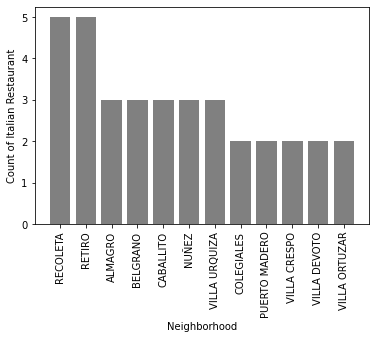

In [475]:
plt.bar(restaurant["Neighborhood"], restaurant["Count"], color = "grey")

plt.xlabel("Neighborhood")
plt.ylabel("Count of Italian Restaurant")
plt.xticks(rotation=90);

### Map of Italian Restaurants

In [476]:
restaurant_map = folium.Map(location=[caba_latitude,caba_longitude], zoom_start=11)

restaurant_map.choropleth(
    geo_data=caba_geo,
    data=restaurant,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.barrio',
    fill_color='PuRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name="Count of Italian Restaurants"
)

restaurant_map

### Exploring the venues of Top 15 List

In [477]:
# one hot encoding
top15_onehot = pd.get_dummies(top15_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
top15_onehot['Neighborhood'] = top15_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [top15_onehot.columns[-1]] + list(top15_onehot.columns[:-1])
top15_onehot = top15_onehot[fixed_columns]


In [478]:
top15_onehot.shape


(1357, 193)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [479]:
top15_grouped = top15_onehot.groupby('Neighborhood').mean().reset_index()

In [480]:
top15_grouped.shape

(15, 193)

In [481]:
num_top_venues = 5

for hood in top15_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = top15_grouped[top15_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALMAGRO----
                    venue  freq
0  Argentinian Restaurant  0.11
1          Ice Cream Shop  0.08
2             Pizza Place  0.07
3                     Bar  0.06
4                     Gym  0.05


----BELGRANO----
              venue  freq
0    Ice Cream Shop  0.07
1       Coffee Shop  0.07
2              Café  0.07
3  Sushi Restaurant  0.04
4            Bakery  0.04


----CABALLITO----
            venue  freq
0  Ice Cream Shop  0.11
1            Café  0.10
2     Coffee Shop  0.10
3          Bakery  0.06
4     Pizza Place  0.05


----COGHLAN----
                    venue  freq
0             Pizza Place  0.10
1  Argentinian Restaurant  0.08
2                  Bakery  0.08
3               BBQ Joint  0.07
4                   Plaza  0.07


----COLEGIALES----
                    venue  freq
0  Argentinian Restaurant  0.09
1          Ice Cream Shop  0.09
2             Coffee Shop  0.06
3                  Bakery  0.06
4             Pizza Place  0.05


----NUÑEZ----
         venue

In [482]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [483]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = top15_grouped['Neighborhood']

for ind in np.arange(top15_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(top15_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(15)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALMAGRO,Argentinian Restaurant,Ice Cream Shop,Pizza Place,Bar,Gym,Café,Restaurant,Coffee Shop,Indie Theater,Italian Restaurant
1,BELGRANO,Ice Cream Shop,Coffee Shop,Café,Sushi Restaurant,Bakery,Pizza Place,Dessert Shop,Peruvian Restaurant,Italian Restaurant,Beer Bar
2,CABALLITO,Ice Cream Shop,Café,Coffee Shop,Bakery,Pizza Place,Argentinian Restaurant,Restaurant,Brewery,Italian Restaurant,Gym
3,COGHLAN,Pizza Place,Argentinian Restaurant,Bakery,BBQ Joint,Plaza,Gym / Fitness Center,Café,Convenience Store,Bar,Deli / Bodega
4,COLEGIALES,Argentinian Restaurant,Ice Cream Shop,Coffee Shop,Bakery,Pizza Place,Café,Brewery,Restaurant,Athletics & Sports,Deli / Bodega
5,NUÑEZ,BBQ Joint,Restaurant,Pizza Place,Coffee Shop,Gym,Ice Cream Shop,Soccer Field,Argentinian Restaurant,Sushi Restaurant,Italian Restaurant
6,PALERMO,Argentinian Restaurant,Ice Cream Shop,Hotel,Wine Shop,Deli / Bodega,Café,Bookstore,Bakery,Sushi Restaurant,Gym / Fitness Center
7,PUERTO MADERO,Argentinian Restaurant,Hotel,Hotel Bar,Coffee Shop,Deli / Bodega,Bar,Food Truck,Burger Joint,Ice Cream Shop,Park
8,RECOLETA,Hotel,Argentinian Restaurant,Ice Cream Shop,Italian Restaurant,Plaza,Park,Café,Coffee Shop,Tea Room,Cocktail Bar
9,RETIRO,Hotel,Coffee Shop,Argentinian Restaurant,Café,Italian Restaurant,Restaurant,Sandwich Place,Cocktail Bar,Ice Cream Shop,Salad Place


In 4 of 15 neighborhoods the most common venue is a Restaurant.

And ...

3 of the remaining 11 have a Restaurant as the second common venue.

# Results

### Clustering venues of Top 15 List

In [484]:
# set number of clusters
kclusters = 4

top15_grouped_clustering = top15_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(top15_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 2, 0, 2, 3, 1, 1, 1, 1])

In [485]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

top15_merged = top15
top15_merged.drop(columns=["avg_price"], inplace=True)


# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
top15_merged = top15_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

top15_merged.head() # check the last columns!

,Neighborhood,lat,lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,PUERTO MADERO,-34.610376,-58.362207,1,Argentinian Restaurant,Hotel,Hotel Bar,Coffee Shop,Deli / Bodega,Bar,Food Truck,Burger Joint,Ice Cream Shop,Park
18,PALERMO,-34.580336,-58.424524,1,Argentinian Restaurant,Ice Cream Shop,Hotel,Wine Shop,Deli / Bodega,Café,Bookstore,Bakery,Sushi Restaurant,Gym / Fitness Center
3,BELGRANO,-34.561308,-58.456545,2,Ice Cream Shop,Coffee Shop,Café,Sushi Restaurant,Bakery,Pizza Place,Dessert Shop,Peruvian Restaurant,Italian Restaurant,Beer Bar
23,RECOLETA,-34.587358,-58.391570,1,Hotel,Argentinian Restaurant,Ice Cream Shop,Italian Restaurant,Plaza,Park,Café,Coffee Shop,Tea Room,Cocktail Bar
17,NUÑEZ,-34.545348,-58.462149,3,BBQ Joint,Restaurant,Pizza Place,Coffee Shop,Gym,Ice Cream Shop,Soccer Field,Argentinian Restaurant,Sushi Restaurant,Italian Restaurant


## Mapping the clusters

In [486]:
# create map
map_clusters = folium.Map(location=[caba_latitude,caba_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(top15_merged['lat'], top15_merged['lon'], top15_merged['Neighborhood'], top15_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [487]:
top15_merged.drop(columns=["lat","lon"], inplace=True)

## Exploring the Clusters

In [488]:
top15_merged.loc[top15_merged['Cluster Labels'] == 0]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,COGHLAN,0,Pizza Place,Argentinian Restaurant,Bakery,BBQ Joint,Plaza,Gym / Fitness Center,Café,Convenience Store,Bar,Deli / Bodega
36,VILLA ORTUZAR,0,BBQ Joint,Bakery,Plaza,Gym / Fitness Center,Café,Restaurant,Burger Joint,Pharmacy,Argentinian Restaurant,Coffee Shop


In [489]:
top15_merged.loc[top15_merged['Cluster Labels'] == 1]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,PUERTO MADERO,1,Argentinian Restaurant,Hotel,Hotel Bar,Coffee Shop,Deli / Bodega,Bar,Food Truck,Burger Joint,Ice Cream Shop,Park
18,PALERMO,1,Argentinian Restaurant,Ice Cream Shop,Hotel,Wine Shop,Deli / Bodega,Café,Bookstore,Bakery,Sushi Restaurant,Gym / Fitness Center
23,RECOLETA,1,Hotel,Argentinian Restaurant,Ice Cream Shop,Italian Restaurant,Plaza,Park,Café,Coffee Shop,Tea Room,Cocktail Bar
24,RETIRO,1,Hotel,Coffee Shop,Argentinian Restaurant,Café,Italian Restaurant,Restaurant,Sandwich Place,Cocktail Bar,Ice Cream Shop,Salad Place


In [490]:
top15_merged.loc[top15_merged['Cluster Labels'] == 2]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,BELGRANO,2,Ice Cream Shop,Coffee Shop,Café,Sushi Restaurant,Bakery,Pizza Place,Dessert Shop,Peruvian Restaurant,Italian Restaurant,Beer Bar
9,COLEGIALES,2,Argentinian Restaurant,Ice Cream Shop,Coffee Shop,Bakery,Pizza Place,Café,Brewery,Restaurant,Athletics & Sports,Deli / Bodega
39,VILLA URQUIZA,2,Pizza Place,Bakery,Ice Cream Shop,Coffee Shop,Café,Argentinian Restaurant,Italian Restaurant,Grocery Store,Restaurant,Beer Bar
25,SAAVEDRA,2,Ice Cream Shop,Plaza,Restaurant,Bakery,Sporting Goods Shop,Bookstore,Coffee Shop,Tea Room,Bus Stop,Pizza Place
6,CABALLITO,2,Ice Cream Shop,Café,Coffee Shop,Bakery,Pizza Place,Argentinian Restaurant,Restaurant,Brewery,Italian Restaurant,Gym
32,VILLA DEVOTO,2,Coffee Shop,Ice Cream Shop,Café,Beer Bar,Pizza Place,Train Station,Restaurant,Plaza,Bistro,Grocery Store


In [491]:
top15_merged.loc[top15_merged['Cluster Labels'] == 3]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,NUÑEZ,3,BBQ Joint,Restaurant,Pizza Place,Coffee Shop,Gym,Ice Cream Shop,Soccer Field,Argentinian Restaurant,Sushi Restaurant,Italian Restaurant
30,VILLA CRESPO,3,Pizza Place,Argentinian Restaurant,Café,BBQ Joint,Coffee Shop,Ice Cream Shop,Bakery,Burger Joint,Clothing Store,Dance Studio
0,ALMAGRO,3,Argentinian Restaurant,Ice Cream Shop,Pizza Place,Bar,Gym,Café,Restaurant,Coffee Shop,Indie Theater,Italian Restaurant


## Conclusion

In based of facts and information showed, Belgrano is the potential place for locate the Italian Restaurant because:

- Belgrano has the 3rd  in most expensive surface for living.
- Belgrano has not a lot of criminal acts like as others neighborhoods with similar surface price (e.g. Palermo)
- Belgrano has cinemas, museums and art galleries that may be a possible demand for a restaurant.
- Belgrano is a neighborhood with many Coffee Stores, Ice cream Stores and other kind of Restaurants.

**AUTHOR: FEDERICO FLORES**